PRIMO PASSO: Autenticazione su kaggle

In [128]:
# importo la libreria da me creata per l'autenticazione su kaggle
# uso la funzione start_kaggle() per autenticarmi su kaggle
from autenticazione.autenticazione import start_kaggle
start_kaggle()

SECONDO PASSO: Download dei dati

In [129]:
# Visualizzare la lista dei dataset
import kaggle

key_search = "covid"

datasets = kaggle.api.datasets_list(search=key_search)

In [130]:
# stampo la lista dei dataset
# la lista di dataset è una lista di dizionari, il cui valore di owner e' contenuto nella key 'ref'
for dataset in datasets:
    print(dataset['ref'])

imdevskp/corona-virus-report
meirnizri/covid19-dataset
sudalairajkumar/covid19-in-india
tawsifurrahman/covid19-radiography-database
gpreda/covid-world-vaccination-progress
roche-data-science-coalition/uncover
andrewmvd/covid19-ct-scans
georgesaavedra/covid19-dataset
hendratno/covid19-indonesia
atilamadai/covid19
sudalairajkumar/covid19-in-usa
sudalairajkumar/covid19-in-italy
iamhungundji/covid19-symptoms-checker
gpreda/covid19-tweets
allen-institute-for-ai/CORD-19-research-challenge
fireballbyedimyrnmom/us-counties-covid-19-dataset
mariaren/covid19-healthy-diet-dataset
tunguz/covid19-genomes
bachrr/covid-chest-xray
kaushiksuresh147/covidvaccine-tweets


In [131]:
# scelgo il dataset che mi interessa e lo scarico
# imposto il path in cui scaricare il dataset
# path = os.path.dirname(os.path.abspath(__file__)) + '/dataset' su juptyer notebook non funziona
# usare invece sys.path[0] + '/dataset' con la libreria sys
import sys
path = sys.path[0] + '/dataset'

# scelgo il dataset che mi interessa
dt_scelto = 'georgesaavedra/covid19-dataset'

# scarico il dataset
kaggle.api.dataset_download_files(dt_scelto, path=path, unzip=True)

TERZO PASSO: Analisi dei dati

In [132]:
# Terzo passo: Analisi del dataset
# importo le librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
# carico il dataset
df = pd.read_csv(path + '/owid-covid-data.csv')

In [134]:
# visualizzo le prime 20 righe del dataset
df.head(20)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [135]:
# visualizziamo le informazioni relative al dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166326 entries, 0 to 166325
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    166326 non-null  object 
 1   continent                                   156370 non-null  object 
 2   location                                    166326 non-null  object 
 3   date                                        166326 non-null  object 
 4   total_cases                                 163293 non-null  float64
 5   new_cases                                   163133 non-null  float64
 6   new_cases_smoothed                          161150 non-null  float64
 7   total_deaths                                145451 non-null  float64
 8   new_deaths                                  145487 non-null  float64
 9   new_deaths_smoothed                         143390 non-null  float64
 

In [136]:
# Creiamo un nuovo dataframe con solo i dati relativi all'Italia
df_italia = df[df['location'] == 'Italy']

In [137]:
# vosualizziamo le prime 20 righe del nuovo dataframe
df_italia.head(20)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
75620,ITA,Europe,Italy,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,...,19.8,27.8,NaN,3.18,83.51,0.892,NaN,NaN,NaN,NaN
75621,ITA,Europe,Italy,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,...,19.8,27.8,NaN,3.18,83.51,0.892,NaN,NaN,NaN,NaN
75622,ITA,Europe,Italy,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,...,19.8,27.8,NaN,3.18,83.51,0.892,-6878.1,-9.02,-6.19,-113.937190
75623,ITA,Europe,Italy,2020-02-03,2.0,0.0,NaN,NaN,NaN,NaN,...,19.8,27.8,NaN,3.18,83.51,0.892,NaN,NaN,NaN,NaN
75624,ITA,Europe,Italy,2020-02-04,2.0,0.0,NaN,NaN,NaN,NaN,...,19.8,27.8,NaN,3.18,83.51,0.892,NaN,NaN,NaN,NaN
75625,ITA,Europe,Italy,2020-02-05,2.0,0.0,NaN,NaN,NaN,NaN,...,19.8,27.8,NaN,3.18,83.51,0.892,NaN,NaN,NaN,NaN
75626,ITA,Europe,Italy,2020-02-06,2.0,0.0,0.286,NaN,NaN,NaN,...,19.8,27.8,NaN,3.18,83.51,0.892,NaN,NaN,NaN,NaN
75627,ITA,Europe,Italy,2020-02-07,3.0,1.0,0.143,NaN,NaN,NaN,...,19.8,27.8,NaN,3.18,83.51,0.892,NaN,NaN,NaN,NaN
75628,ITA,Europe,Italy,2020-02-08,3.0,0.0,0.143,NaN,NaN,NaN,...,19.8,27.8,NaN,3.18,83.51,0.892,NaN,NaN,NaN,NaN
75629,ITA,Europe,Italy,2020-02-09,3.0,0.0,0.143,NaN,NaN,NaN,...,19.8,27.8,NaN,3.18,83.51,0.892,-7684.4,-8.48,-5.62,-127.293721


In [138]:
import pprint as pp

# stampiamo a video una lista delle colonne con ogni valore per ogni riga
pp.pprint(df_italia.columns.tolist())

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

In [139]:
# eliminiamo le colonne che non ci servono
df_italia = df_italia.drop(
    [
    'iso_code',
    'continent',
    'location',
    'new_cases_smoothed',
    'new_deaths_smoothed',
    'total_cases_per_million',
    'new_cases_per_million',
    'new_cases_smoothed_per_million',
    'total_deaths_per_million',
    'new_deaths_per_million',
    'new_deaths_smoothed_per_million',
    'icu_patients_per_million',
    'hosp_patients_per_million',
    'weekly_icu_admissions',
    'weekly_icu_admissions_per_million',
    'weekly_hosp_admissions',
    'weekly_hosp_admissions_per_million',
    'total_tests_per_thousand',
    'new_tests_per_thousand',
    'new_tests_smoothed',
    'new_tests_smoothed_per_thousand',
    'positive_rate',
    'tests_per_case',
    'people_fully_vaccinated',
    'new_vaccinations_smoothed',
    'total_vaccinations_per_hundred',
    'people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred',
    'total_boosters_per_hundred',
    'new_vaccinations_smoothed_per_million',
    'new_people_vaccinated_smoothed',
    'new_people_vaccinated_smoothed_per_hundred',
    'handwashing_facilities',
    'hospital_beds_per_thousand',
    'excess_mortality_cumulative_absolute',
    'excess_mortality_cumulative',
    'excess_mortality_cumulative_per_million',
    'reproduction_rate',
    'median_age',
    'aged_65_older',
    'aged_70_older',
    'gdp_per_capita',
    'extreme_poverty',
    'cardiovasc_death_rate',
    'diabetes_prevalence',
    'female_smokers',
    'male_smokers',
    'life_expectancy',
    'human_development_index',
    'excess_mortality'
    ], 
    axis=1)

In [140]:
# trasformiamo la colonna 'date' in un oggetto datetime e la impostiamo come indice del dataframe
df_italia['date'] = pd.to_datetime(df_italia['date'])
df_italia = df_italia.set_index('date')

In [141]:
# sostiutiamo i valori NaN con 0
df_italia = df_italia.fillna(0)

In [142]:
# visualizziamo le prime 20 righe del nuovo dataframe
df_italia.head(20)

,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,new_tests,total_tests,tests_units,total_vaccinations,people_vaccinated,total_boosters,new_vaccinations,stringency_index,population,population_density
date,,,,,,,,,,,,,,,,
2020-01-31,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,19.44,60367471.0,205.859
2020-02-01,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,19.44,60367471.0,205.859
2020-02-02,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,19.44,60367471.0,205.859
2020-02-03,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,19.44,60367471.0,205.859
2020-02-04,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,19.44,60367471.0,205.859
2020-02-05,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,19.44,60367471.0,205.859
2020-02-06,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,19.44,60367471.0,205.859
2020-02-07,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,19.44,60367471.0,205.859
2020-02-08,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,19.44,60367471.0,205.859


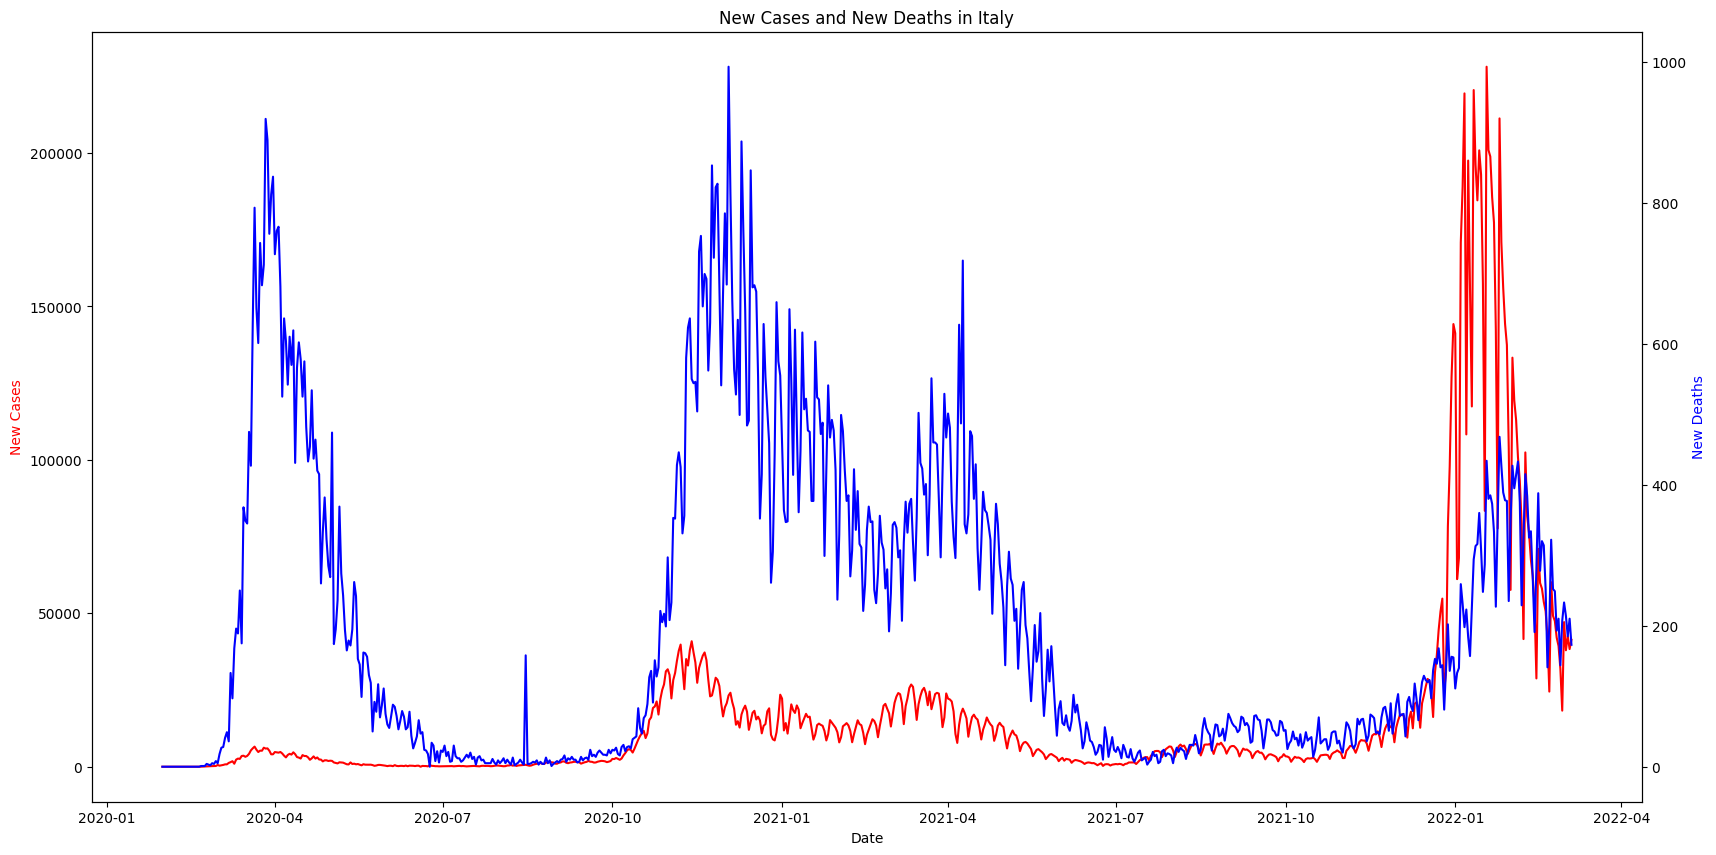

In [143]:
# plottiamo i dati relativi ai nuovi casi giornalieri e le nuove morti giornaliere
# separiamo i due assi y per avere una migliore visualizzazione
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
ax1.plot(df_italia['new_cases'], color='red')
ax2.plot(df_italia['new_deaths'], color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('New Cases', color='red')
ax2.set_ylabel('New Deaths', color='blue')
plt.title('New Cases and New Deaths in Italy')
plt.show()

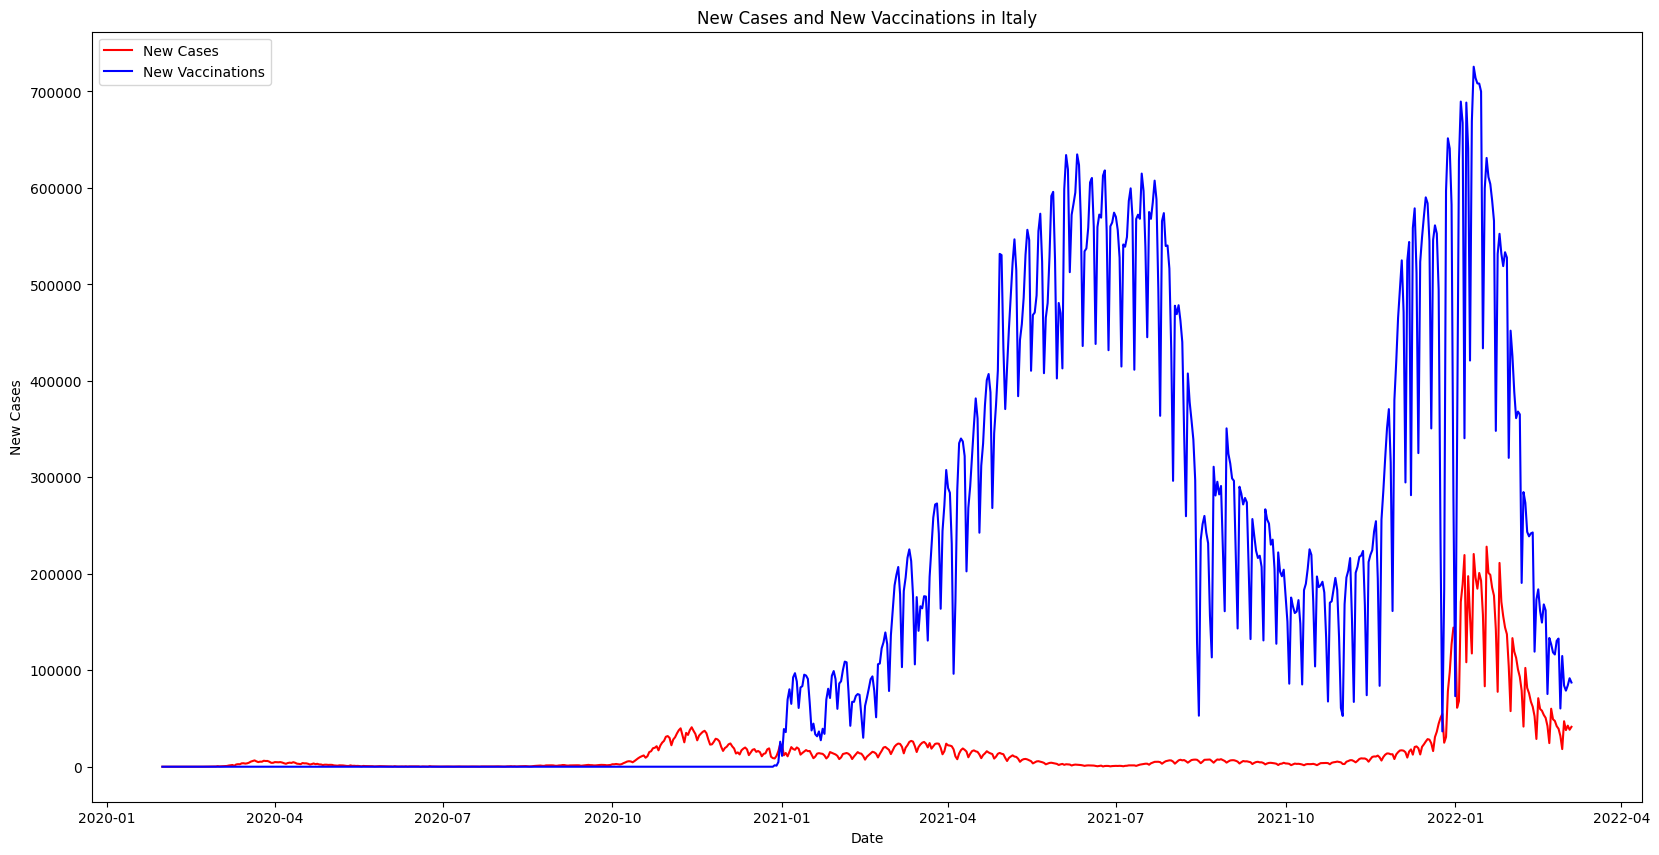

In [144]:
# confrontiamo i dati relativi ai vaccini somministrati con i nuovi casi giornalieri
plt.figure(figsize=(20, 10))
plt.plot(df_italia['new_cases'], color='red')
plt.plot(df_italia['new_vaccinations'], color='blue')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend(['New Cases', 'New Vaccinations'])
plt.title('New Cases and New Vaccinations in Italy')
plt.show()

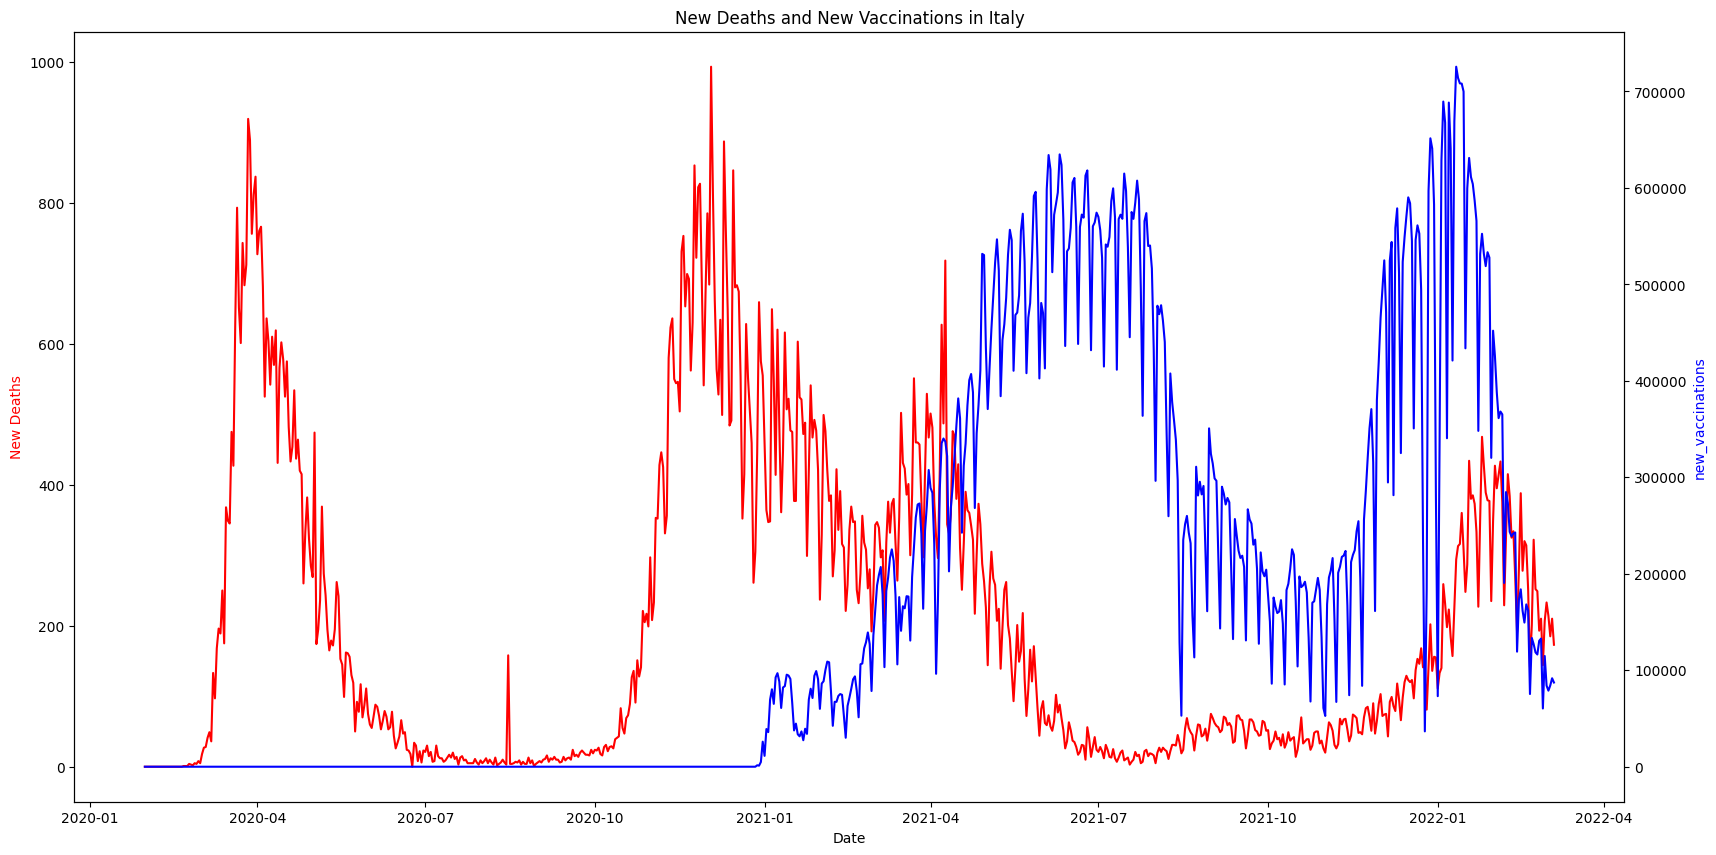

In [145]:
# confrontiamo i dati relativi ai vaccini somministrati con i nuovi morti giornalieri
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
ax1.plot(df_italia['new_deaths'], color='red')
ax2.plot(df_italia['new_vaccinations'], color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('New Deaths', color='red')
ax2.set_ylabel('new_vaccinations', color='blue')
plt.title('New Deaths and New Vaccinations in Italy')
plt.show()

Tasso di mortalità giornaliero in funzione al numero di nuovi casi giornalieri
Tasso di mortalità giornaliero massimo:  0.4971751412429379
Data tasso di mortalità giornaliero massimo:  2020-06-04 00:00:00
Tasso di mortalità giornaliero in funzione al numero di abitanti
Tasso di mortalità giornaliero massimo:  1.6449256255906428
Data tasso di mortalità giornaliero massimo:  2020-12-03 00:00:00


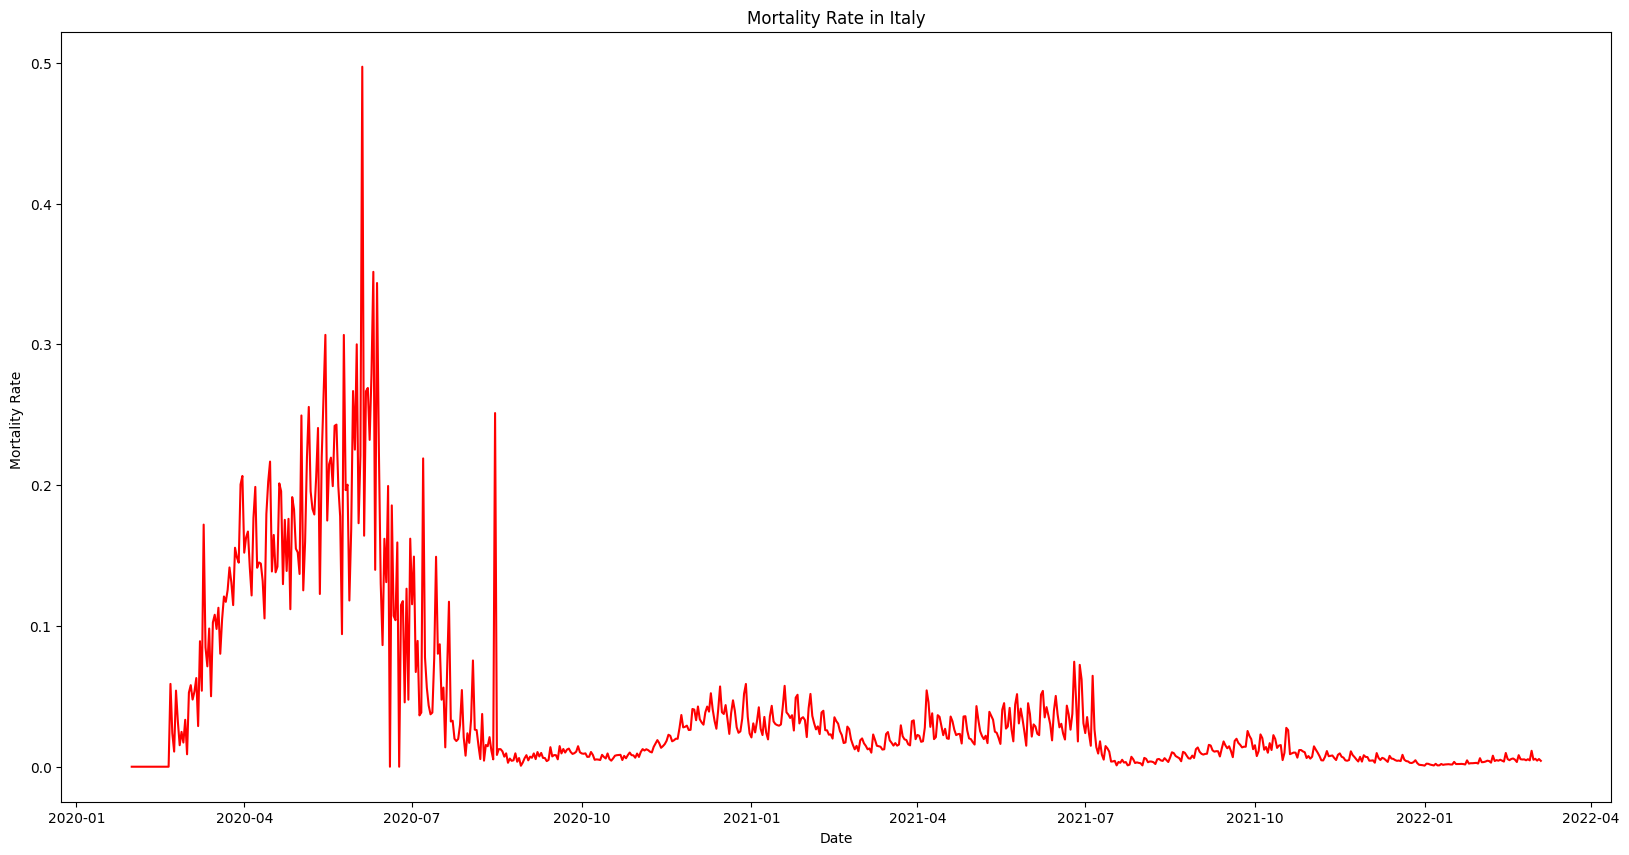

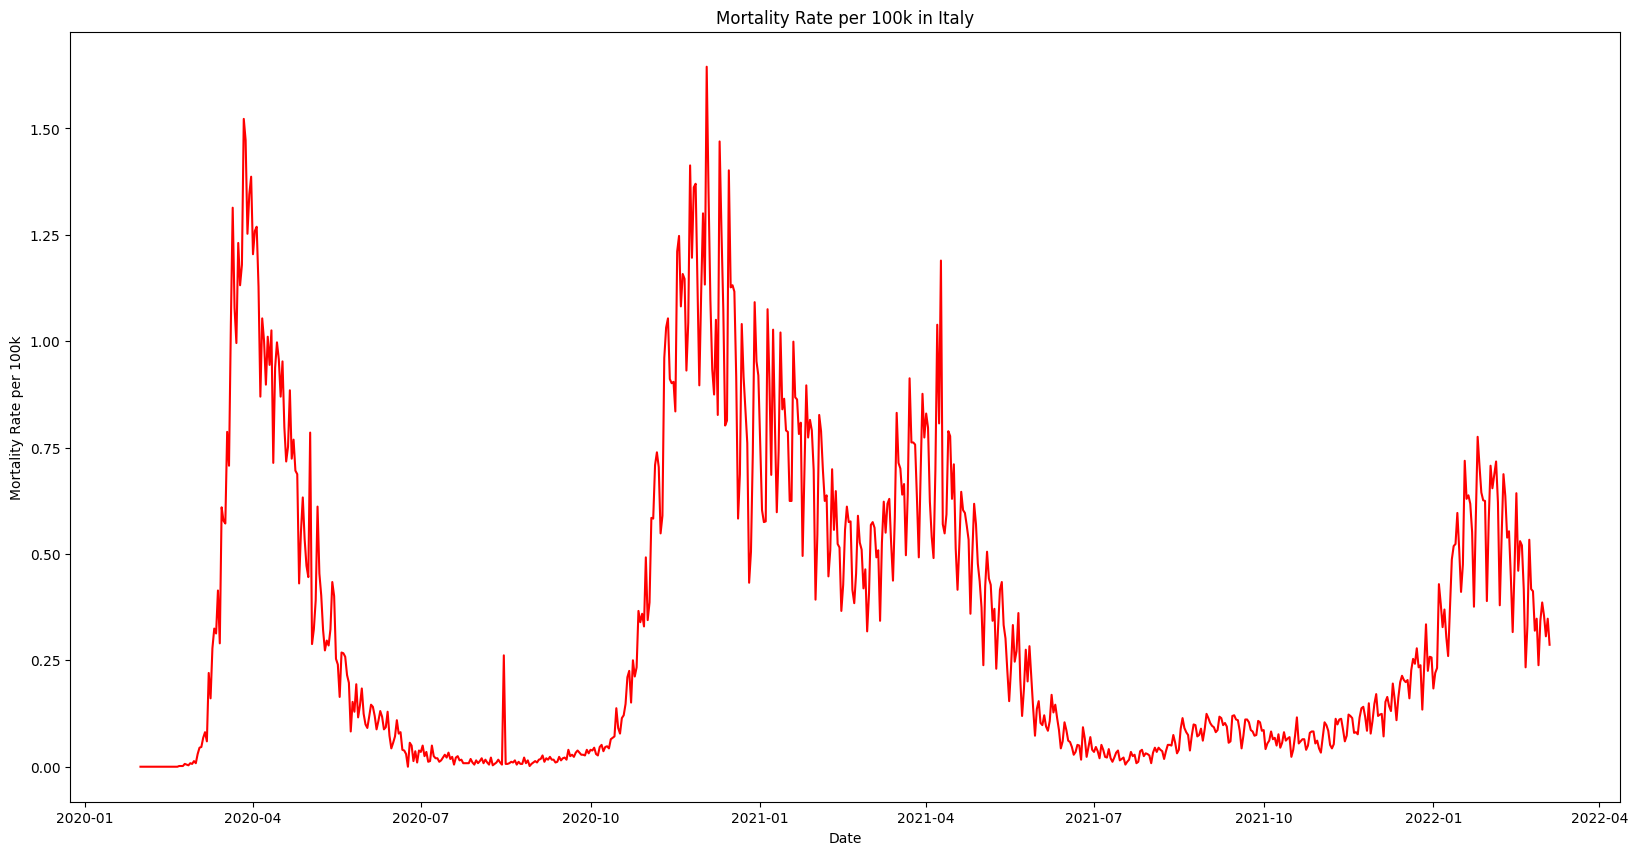

In [146]:
# calcoliamo il tasso di mortalità giornaliero
df_italia['mortality_rate'] = df_italia['new_deaths'] / df_italia['new_cases'] 

# sostituimo i valori NaN con 0 in 'mortality_rate' e dove il valore è infinito con 0
df_italia['mortality_rate'] = df_italia['mortality_rate'].replace([np.inf, -np.inf], np.nan)
df_italia['mortality_rate'] = df_italia['mortality_rate'].fillna(0)

# calculiamo il tasso di mortalità giornaiero rispetto al numero di abitanti
df_italia['mortality_rate_per_100k'] = df_italia['new_deaths']  / df_italia['population'] * 100000

# printiamo a video il valore massimo del tasso di mortalità giornaliero massimo e la data in cui si è verificato
tasso_mortalita_massimo = df_italia['mortality_rate'].max()
data_tasso_mortalita_massimo = df_italia['mortality_rate'].idxmax()

# printiamo a video il valore massimo del tasso di mortalità giornaliero rispetto al numero di abitanti e la data in cui si è verificato
tasso_mortalita_per_100k_massimo = df_italia['mortality_rate_per_100k'].max()
data_tasso_mortalita_per_100k_massimo = df_italia['mortality_rate_per_100k'].idxmax()

print('Tasso di mortalità giornaliero in funzione al numero di nuovi casi giornalieri')
print('Tasso di mortalità giornaliero massimo: ', tasso_mortalita_massimo)
print('Data tasso di mortalità giornaliero massimo: ', data_tasso_mortalita_massimo)
print('Tasso di mortalità giornaliero in funzione al numero di abitanti')
print('Tasso di mortalità giornaliero massimo: ', tasso_mortalita_per_100k_massimo)
print('Data tasso di mortalità giornaliero massimo: ', data_tasso_mortalita_per_100k_massimo)

# plottiamo il tasso di mortalità giornaliero
plt.figure(figsize=(20, 10))
plt.plot(df_italia['mortality_rate'], color='red')
plt.xlabel('Date')
plt.ylabel('Mortality Rate ')
plt.title('Mortality Rate in Italy')
plt.show()

# plottiamo il tasso di mortalità giornaliero rispetto ai nuovi casi giornalieri
plt.figure(figsize=(20, 10))
plt.plot(df_italia['mortality_rate_per_100k'], color='red')
plt.xlabel('Date')
plt.ylabel('Mortality Rate per 100k')
plt.title('Mortality Rate per 100k in Italy')
plt.show()


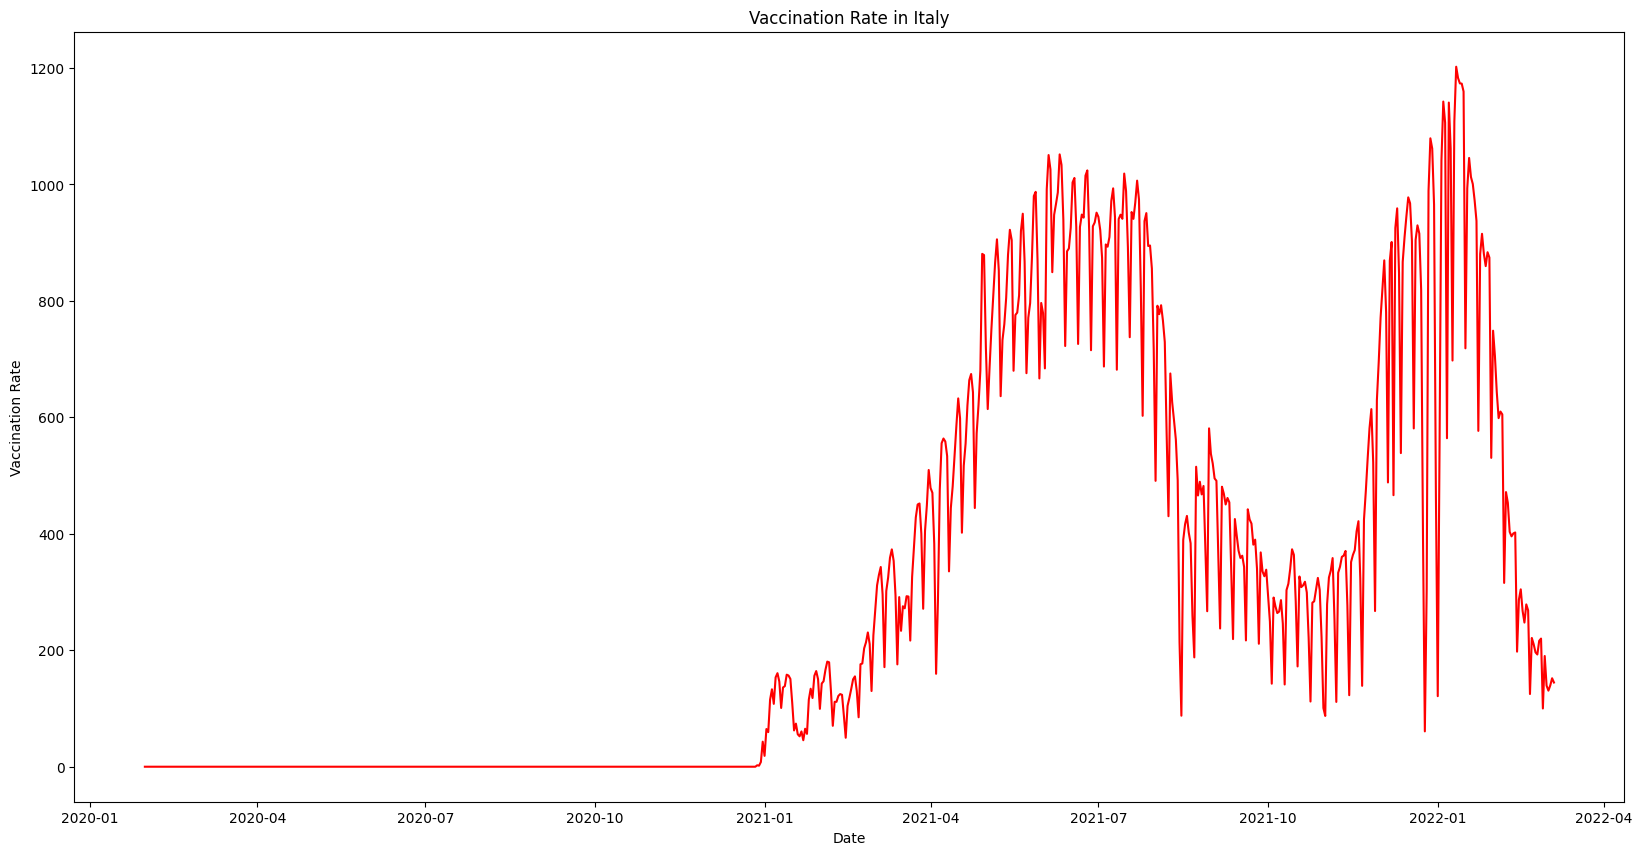

In [147]:
# calcoliamo il tasso di vaccinazione giornaliero
df_italia['vaccination_rate'] = df_italia['new_vaccinations'] / df_italia['population'] * 100000

# plottiamo il tasso di vaccinazione giornaliero
plt.figure(figsize=(20, 10))
plt.plot(df_italia['vaccination_rate'], color='red')
plt.xlabel('Date')
plt.ylabel('Vaccination Rate')
plt.title('Vaccination Rate in Italy')
plt.show()


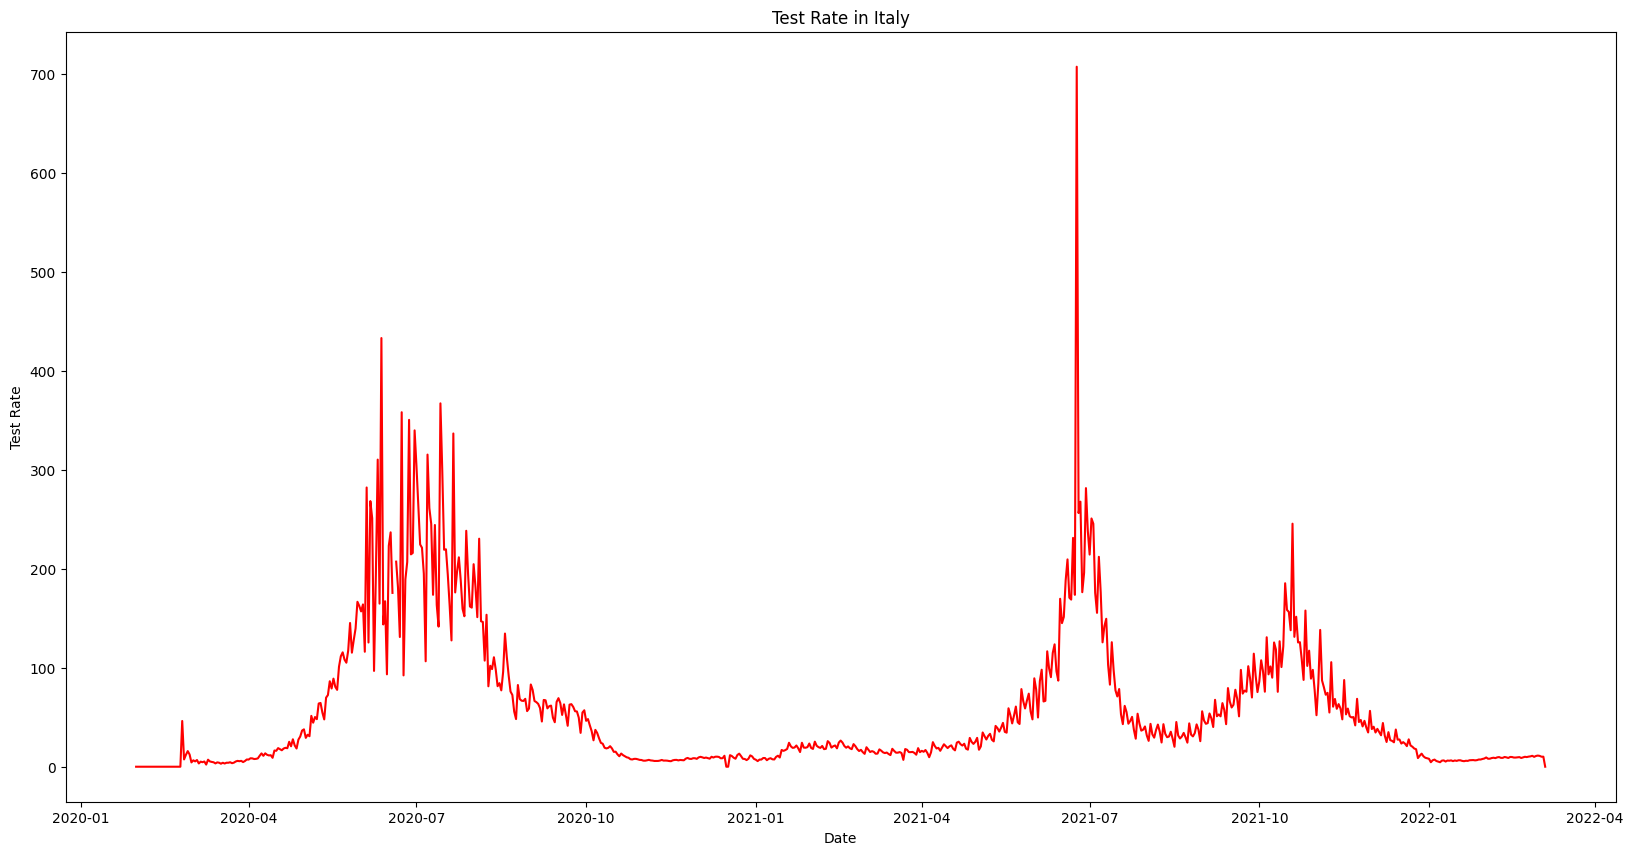

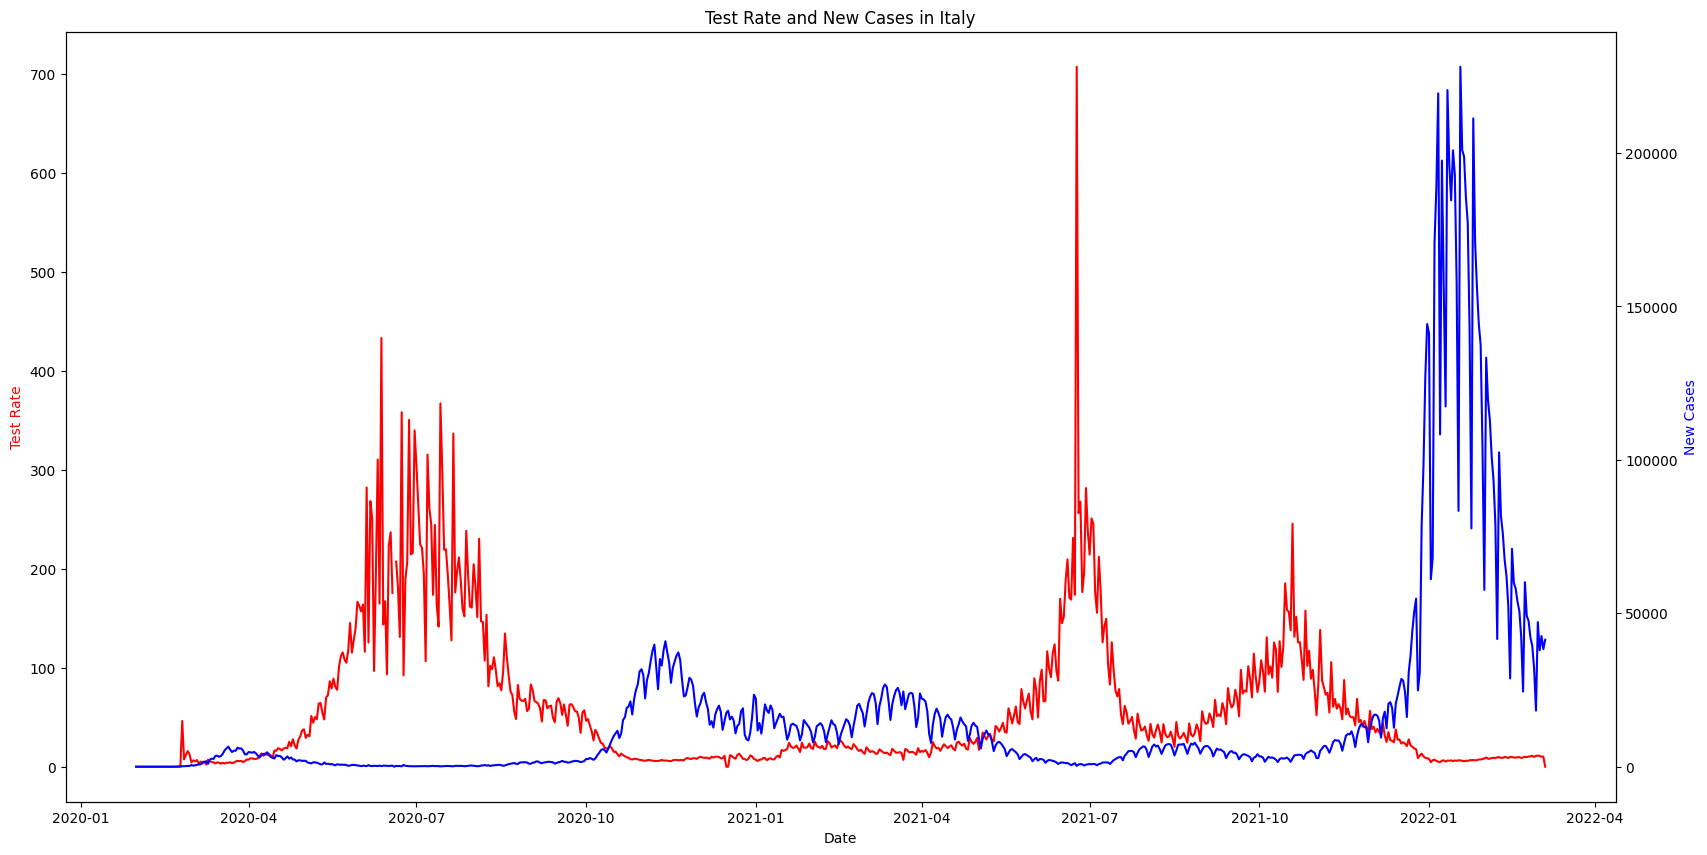

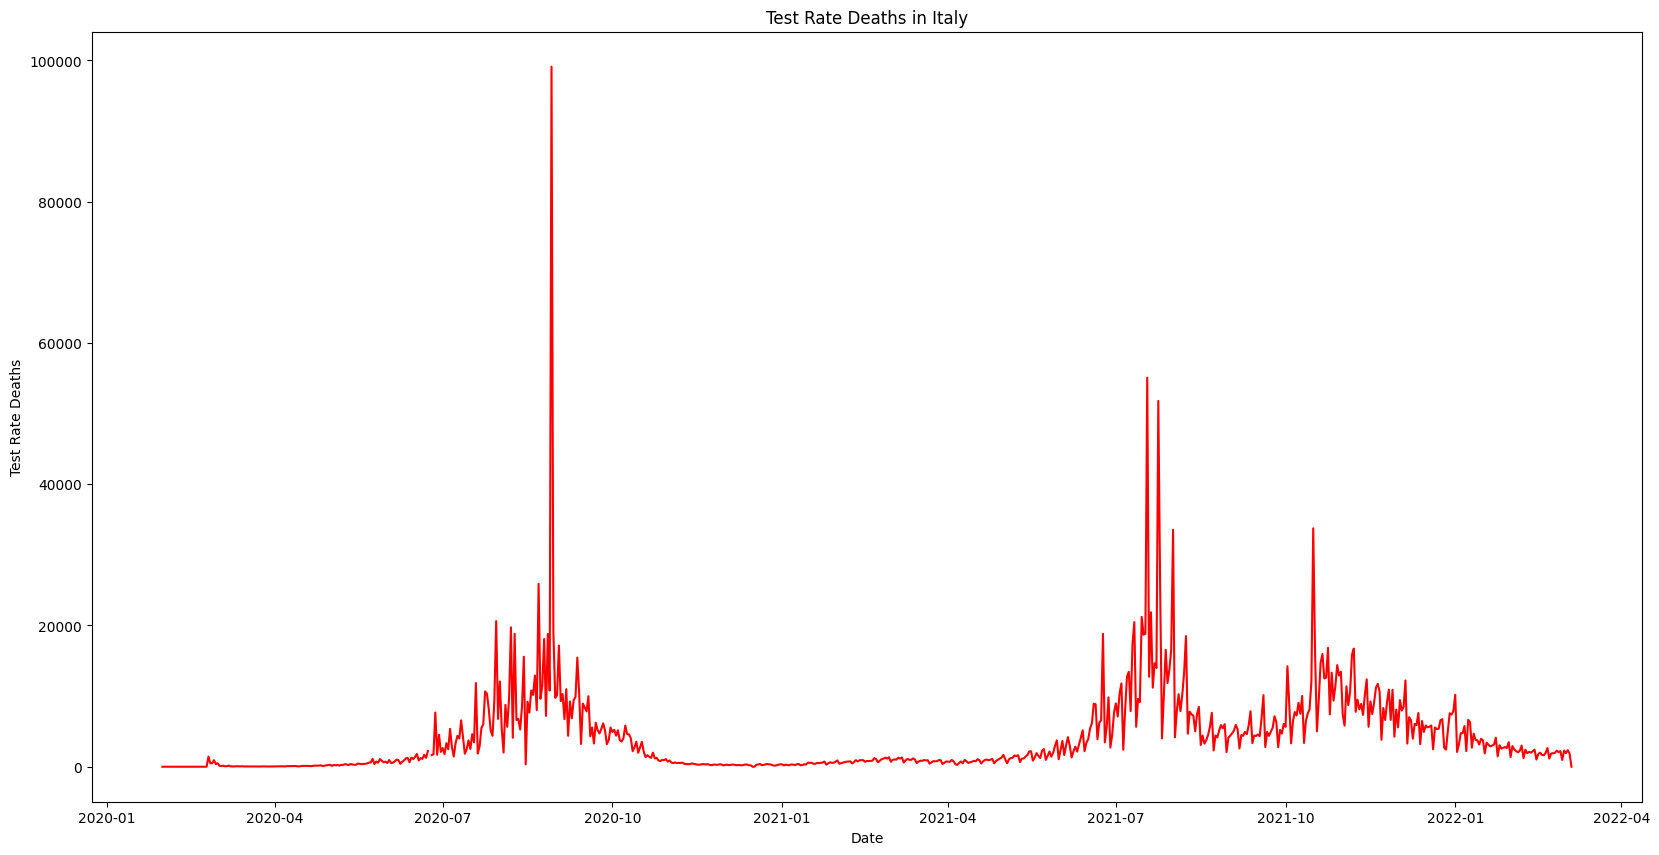

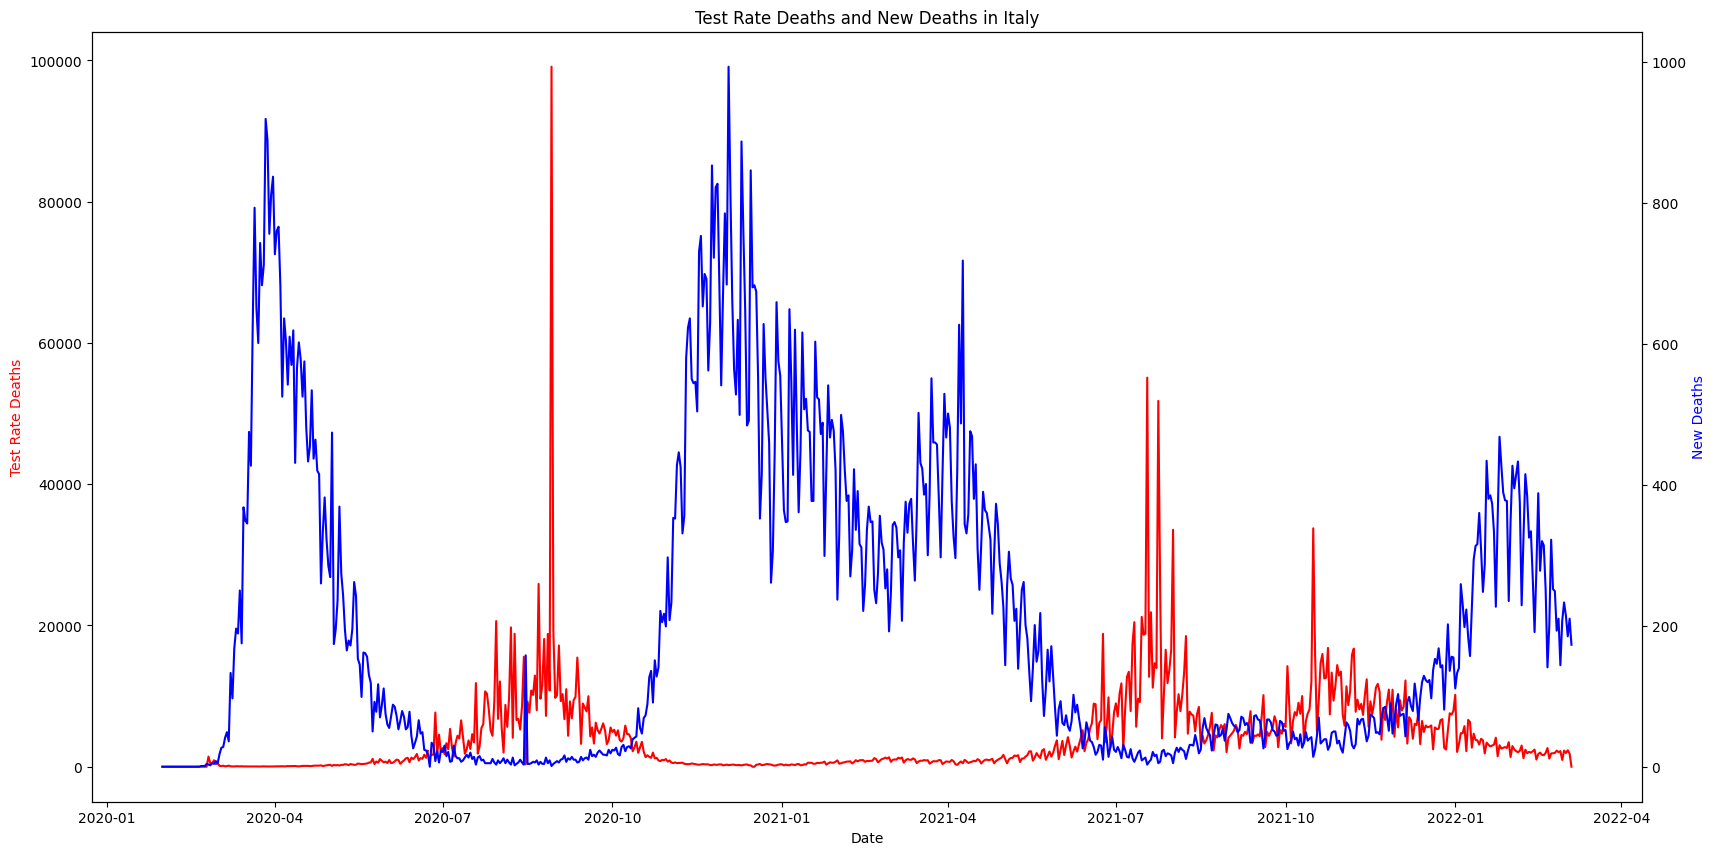

In [148]:
# calcoliamo il rapporto tra i nuovi test giornalieri e i nuovi casi giornalieri
df_italia['test_rate'] = df_italia['new_tests'] / df_italia['new_cases']

# sostituiamo i valori NaN con 0
df_italia['test_rate'] = df_italia['test_rate'].fillna(0)

# calcoliamo il rapporto tra i nuovi test giornalieri e i nuovi casi morti giornalieri
df_italia['test_rate_deaths'] = df_italia['new_tests'] / df_italia['new_deaths']

# sostituiamo i valori NaN con 0
df_italia['test_rate_deaths'] = df_italia['test_rate_deaths'].fillna(0)

# plottiamo il rapporto tra i nuovi test giornalieri e i nuovi casi giornalieri
plt.figure(figsize=(20, 10))
plt.plot(df_italia['test_rate'], color='red')
plt.xlabel('Date')
plt.ylabel('Test Rate')
plt.title('Test Rate in Italy')
plt.show()

# plotto il grafico tra il 'test_rate' e i 'new_cases' con due assi y
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
ax1.plot(df_italia['test_rate'], color='red')
ax2.plot(df_italia['new_cases'], color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Test Rate', color='red')
ax2.set_ylabel('New Cases', color='blue')
plt.title('Test Rate and New Cases in Italy')
plt.show()

# plottiamo il rapporto tra i nuovi test giornalieri e i nuovi morti giornalieri
plt.figure(figsize=(20, 10))
plt.plot(df_italia['test_rate_deaths'], color='red')
plt.xlabel('Date')
plt.ylabel('Test Rate Deaths')
plt.title('Test Rate Deaths in Italy')
plt.show()

# plotto il grafico tra il 'test_rate_deaths' e i 'new_deaths' con due assi y
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
ax1.plot(df_italia['test_rate_deaths'], color='red')
ax2.plot(df_italia['new_deaths'], color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Test Rate Deaths', color='red')
ax2.set_ylabel('New Deaths', color='blue')
plt.title('Test Rate Deaths and New Deaths in Italy')
plt.show()

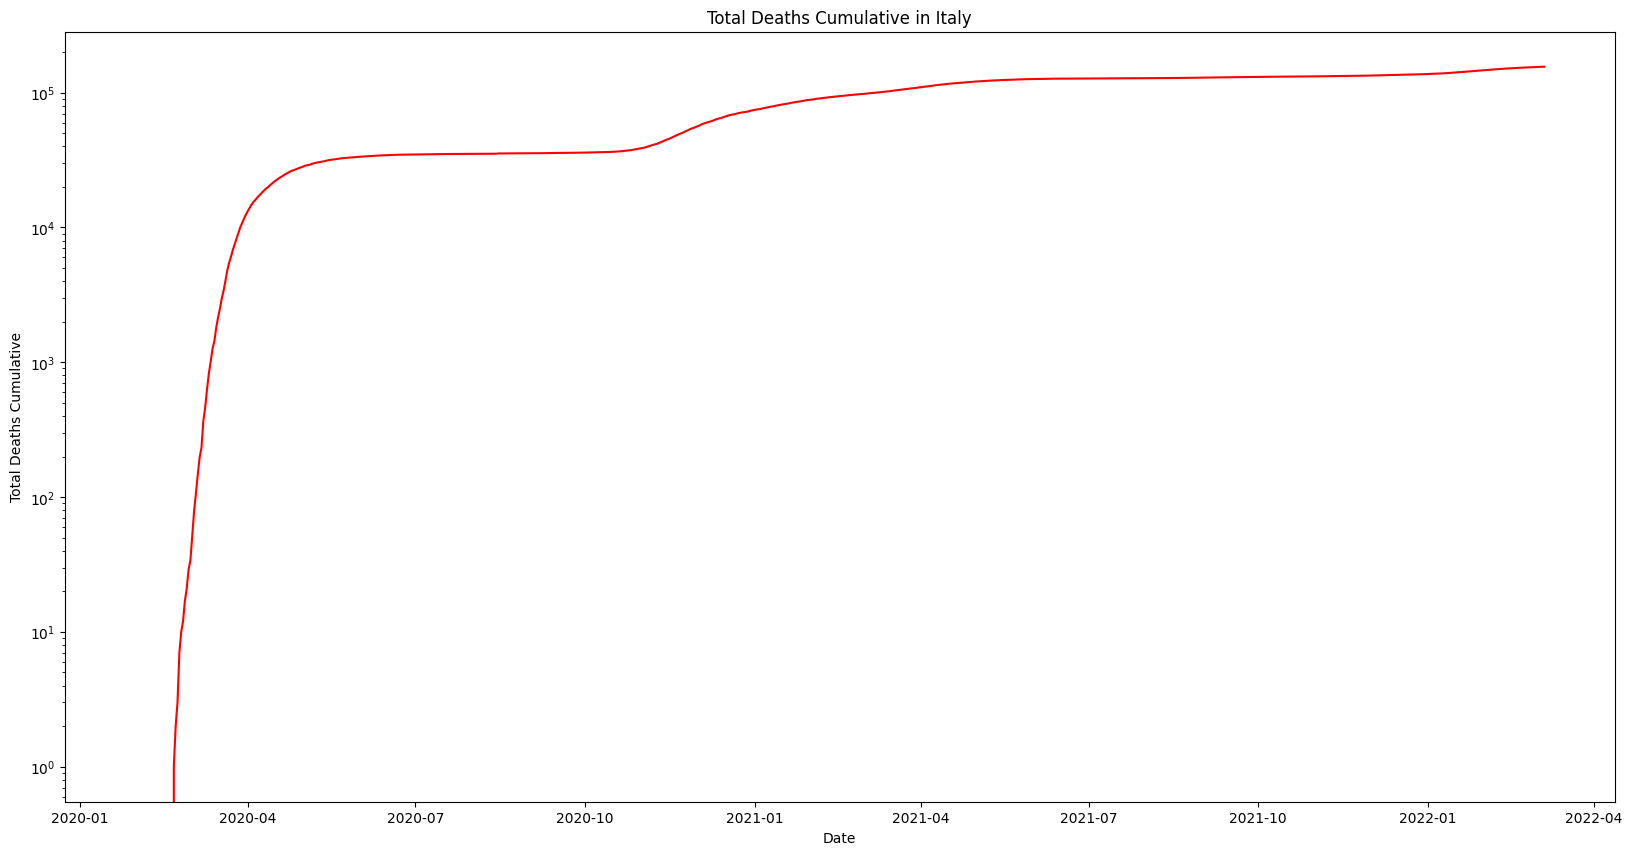

In [149]:
# calcoliamo il dato dei morti cumulativi giornalieri
df_italia['total_deaths_cumulative'] = df_italia['new_deaths'].cumsum()

# plottiamo il dato dei morti cumulativi giornalieri su scala logaritmica
plt.figure(figsize=(20, 10))
plt.plot(df_italia['total_deaths_cumulative'], color='red')
plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Total Deaths Cumulative')
plt.title('Total Deaths Cumulative in Italy')
plt.show()

